# Biases in Causal Inference

When we try to estimate causal effects in non-random experiments, we need to be very careful about feature selection. If we are not, our treatment effect estimates may suffer from bias or high variance. In this notebook I will shortly describe different types of variables we could consider in our model and how they may impact our treatment effect estimates.

### 1. Confounder

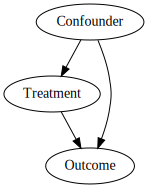

In [125]:
from causalgraphicalmodels import CausalGraphicalModel

sprinkler = CausalGraphicalModel(
    nodes=["Confounder", "Treatment", "Outcome"],
    edges=[
        ("Confounder", "Treatment"), 
        ("Confounder", "Outcome"),
        ("Treatment", "Outcome")
    ]
)

sprinkler.draw()

Confounders are variables that influence both the treatment and the outcome. If we forget to include a confounder in our model, our estimate of the treatment effect will suffer from bias.

### 2. Y Predictor

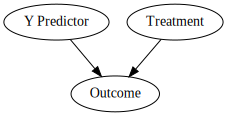

In [126]:
sprinkler = CausalGraphicalModel(
    nodes=["Treatment", "Y Predictor", "Outcome"],
    edges=[
        ("Treatment", "Outcome"), 
        ("Y Predictor", "Outcome")
    ]
)

sprinkler.draw()

Y Predictors are variables that influence the outcome and are independent from the treatment. If we include a Y Predictor in our model, we can reduce the standard error of our treatment effect estimate.

### 3. Mediator

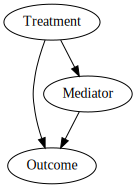

In [127]:
sprinkler = CausalGraphicalModel(
    nodes=["Treatment", "Mediator", "Outcome"],
    edges=[
        ("Treatment", "Outcome"), 
        ("Treatment", "Mediator"),
        ("Mediator", "Outcome")
    ]
)

sprinkler.draw()

Mediators are variables that stand between the treatment and the outcome. They influence the outcome but themselves are influenced by the treatment. If we put mediators into our model, our estimate will suffer from bias as we neglect the indirect effect of the treatment that flows through the mediator.

### 4. Common Effect

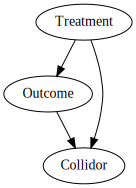

In [130]:
sprinkler = CausalGraphicalModel(
    nodes=["Treatment", "Outcome", "Collidor"],
    edges=[
        ("Treatment", "Collidor"), 
        ("Treatment", "Outcome"),
        ("Outcome", "Collidor")
    ]
)

sprinkler.draw()

Common Effects are variables that are influenced by both the treatment and the outcome. If we put a common effect (also called collidor) into our model, we will observe an distorted association between the treatment and the outcome and thus our treatment effect estimate will suffer from bias.